# Decision Tree Classifier, Random Forest Classifier on Game Prediction

#### Dataset from "SteamSpy" based on Steam with estimated number of Owners per game. 
Source: "https://steamspy.com/"

### Import the necessary modules and loaded the data into a Pandas DataFrame named data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# For Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Added onehot and resample for decision tree to try out, imported randomforest
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

ohe = OneHotEncoder()


In [2]:
data = pd.read_csv('GameData_backup_with_review.csv' ,low_memory=0, header=0 , keep_default_na=False , encoding='ANSI')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41308 entries, 0 to 41307
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   appid                  41308 non-null  int64  
 1   name                   41308 non-null  object 
 2   developer              41308 non-null  object 
 3   publisher              41308 non-null  object 
 4   score_rank             41308 non-null  object 
 5   positive               41308 non-null  int64  
 6   negative               41308 non-null  int64  
 7   userscore              41308 non-null  int64  
 8   owners                 41308 non-null  int64  
 9   average_forever        41308 non-null  int64  
 10  average_2weeks         41308 non-null  int64  
 11  median_forever         41308 non-null  int64  
 12  median_2weeks          41308 non-null  int64  
 13  price                  41308 non-null  float64
 14  initialprice           41308 non-null  float64
 15  di

In [3]:
data.describe()

,appid,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,...,Indie,Free To Play,RPG,Strategy,Sports,Simulation,Racing,Massivley Multiplayer,Act_Adv,review
count,4.130800e+04,4.130800e+04,41308.000000,41308.000000,4.130800e+04,41308.000000,41308.000000,41308.000000,41308.000000,41308.000000,...,41308.000000,41308.0,41308.000000,41308.000000,41308.000000,41308.000000,41308.000000,41308.0,41308.000000,41308.000000
mean,8.096821e+05,1.362381e+03,231.833107,0.088796,1.729997e+05,175.028033,6.868960,159.013532,7.043188,6.988034,...,0.738186,0.0,0.170814,0.193207,0.050668,0.195120,0.036748,0.0,0.638254,68.059625
std,3.598324e+05,3.110861e+04,6040.278945,2.659110,1.588070e+06,2403.589123,107.629267,2551.579873,110.290004,10.467973,...,0.439627,0.0,0.376351,0.394819,0.219322,0.396298,0.188146,0.0,0.480512,27.823349
min,3.000000e+02,0.000000e+00,0.000000,0.000000,2.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,5.175075e+05,5.000000e+00,1.000000,0.000000,2.000000e+04,0.000000,0.000000,0.000000,0.000000,0.990000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,54.000000
50%,8.047550e+05,2.100000e+01,7.000000,0.000000,2.000000e+04,0.000000,0.000000,0.000000,0.000000,4.900000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,75.000000
75%,1.101762e+06,1.210000e+02,38.000000,0.000000,5.000000e+04,2.000000,0.000000,2.000000,0.000000,9.900000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,89.000000
max,1.769630e+06,5.540107e+06,875035.000000,100.000000,2.000000e+08,245061.000000,8870.000000,245061.000000,8870.000000,999.900000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,100.000000


### I split the data into 2 DataFrames named x and y
#### x contains the Predictor Variables and y contains the Response Variables

In [4]:
y = pd.DataFrame(data["owner_cat"])
x = pd.DataFrame(data[['positive', 'negative', 'initialprice', 'total_lang',
                       '18+', 'Indie', 'Free To Play', 'RPG',
                       'Strategy', 'Sports', 'Simulation', 'Racing',
                       'Massivley Multiplayer', 'Act_Adv']])

In [5]:
# Further split dataset into train and test dataframes for x and y.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

Train Set : (30981, 1) (30981, 14)
Test Set  : (10327, 1) (10327, 14)


### Create Decision Tree Classifier

#### Set decision tree depth at 10 as depth up to 8 gave an accuracy of roughly 75-78%, but depth = 10 had training accuracy of 80%

In [6]:
dectree = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.805461411833059

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7584003098673381



### Plot the Confusion Matrix for Train and Test

#### 

Train data set: 


<AxesSubplot:>

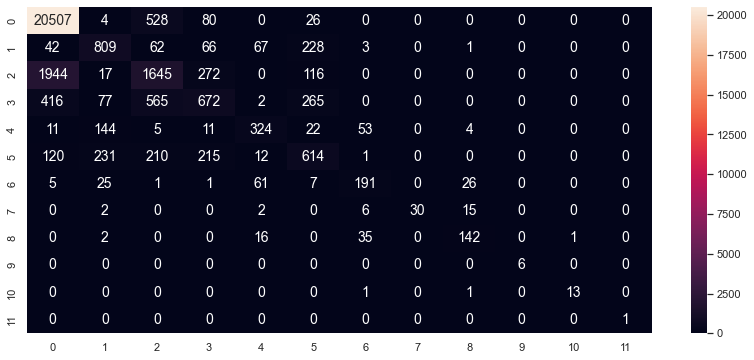

In [7]:
f = plt.figure(figsize=(14, 6))
print("Train data set: ")
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 14})

Test data set: 


<AxesSubplot:>

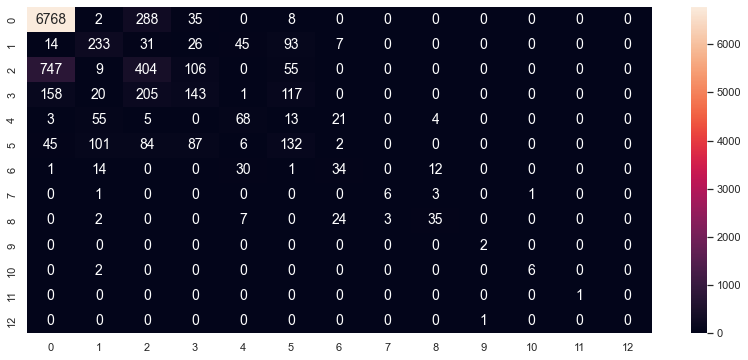

In [8]:
f = plt.figure(figsize=(14, 6))
print("Test data set: ")
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 14})

### Plotting Decision Tree - Predicting 12 different classes of different owner sizes, 

[Text(0.488113118723099, 0.9545454545454546, 'negative <= 30.5\ngini = 0.509\nsamples = 30981\nvalue = [21145, 1278, 3994, 1997, 574, 1403, 317, 55, 196, 6\n15, 1]\nclass = 0'),
 Text(0.24320189203730272, 0.8636363636363636, 'positive <= 46.5\ngini = 0.21\nsamples = 22337\nvalue = [19740, 32, 2041, 412, 8, 100, 4, 0, 0, 0, 0, 0]\nclass = 0'),
 Text(0.1367579806312769, 0.7727272727272727, 'negative <= 12.5\ngini = 0.142\nsamples = 18812\nvalue = [17390, 28, 1129, 202, 6, 55, 2, 0, 0, 0, 0, 0]\nclass = 0'),
 Text(0.06940459110473457, 0.6818181818181818, 'initialprice <= 0.45\ngini = 0.116\nsamples = 16709\nvalue = [15685, 22, 800, 153, 5, 43, 1, 0, 0, 0, 0, 0]\nclass = 0'),
 Text(0.03402977044476327, 0.5909090909090909, 'positive <= 17.5\ngini = 0.231\nsamples = 2274\nvalue = [1981, 4, 216, 54, 3, 15, 1, 0, 0, 0, 0, 0]\nclass = 0'),
 Text(0.019279053084648494, 0.5, 'positive <= 1.5\ngini = 0.197\nsamples = 1801\nvalue = [1607, 3, 142, 37, 1, 10, 1, 0, 0, 0, 0, 0]\nclass = 0'),
 Text(0.01

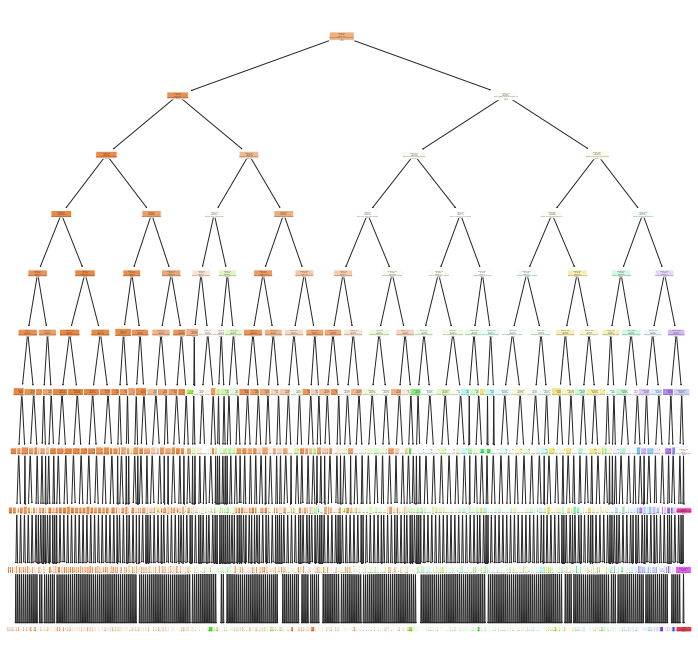

In [9]:
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=["0","1","2","3","4","5","6","7","8","9","10","11","12"])

### Accuracy of Decision Tree Classifier is quite good compared to Machine Learning. However, if we try to resample, it might result in a better accuracy.
#### We decided to try resampling with Decision Tree Classifier

In [10]:
# Created new predictor and response DataFrame named predictors and owner_cat and fitted owner_cat with onehot encoder

owner_cat = pd.DataFrame(data["owner_cat"])

predictors = pd.DataFrame(data[['positive', 'negative', 'initialprice', 
                             'total_lang', '18+', 'Indie', 'Free To Play', 
                             'RPG', 'Strategy', 'Sports', 'Simulation', 
                             'Racing', 'Massivley Multiplayer', 'Act_Adv', 'review']])
ohe.fit(owner_cat)
owner_cat_ohe = pd.DataFrame(ohe.transform(owner_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(owner_cat.columns))

owner_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41308 entries, 0 to 41307
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   owner_cat_0   41308 non-null  float64
 1   owner_cat_1   41308 non-null  float64
 2   owner_cat_2   41308 non-null  float64
 3   owner_cat_3   41308 non-null  float64
 4   owner_cat_4   41308 non-null  float64
 5   owner_cat_5   41308 non-null  float64
 6   owner_cat_6   41308 non-null  float64
 7   owner_cat_7   41308 non-null  float64
 8   owner_cat_8   41308 non-null  float64
 9   owner_cat_9   41308 non-null  float64
 10  owner_cat_10  41308 non-null  float64
 11  owner_cat_11  41308 non-null  float64
 12  owner_cat_12  41308 non-null  float64
dtypes: float64(13)
memory usage: 4.1 MB


In [11]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41308 entries, 0 to 41307
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   positive               41308 non-null  int64  
 1   negative               41308 non-null  int64  
 2   initialprice           41308 non-null  float64
 3   total_lang             41308 non-null  int64  
 4   18+                    41308 non-null  int64  
 5   Indie                  41308 non-null  int64  
 6   Free To Play           41308 non-null  int64  
 7   RPG                    41308 non-null  int64  
 8   Strategy               41308 non-null  int64  
 9   Sports                 41308 non-null  int64  
 10  Simulation             41308 non-null  int64  
 11  Racing                 41308 non-null  int64  
 12  Massivley Multiplayer  41308 non-null  int64  
 13  Act_Adv                41308 non-null  int64  
 14  review                 41308 non-null  int64  
dtypes:

In [12]:
# Compiled both predictor and response variable into 1 large dataframe named as data_ohe
data_ohe = pd.concat([predictors, owner_cat_ohe], 
                           sort = False, axis = 1).reindex(index=predictors.index)

# Check the final dataframe
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41308 entries, 0 to 41307
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   positive               41308 non-null  int64  
 1   negative               41308 non-null  int64  
 2   initialprice           41308 non-null  float64
 3   total_lang             41308 non-null  int64  
 4   18+                    41308 non-null  int64  
 5   Indie                  41308 non-null  int64  
 6   Free To Play           41308 non-null  int64  
 7   RPG                    41308 non-null  int64  
 8   Strategy               41308 non-null  int64  
 9   Sports                 41308 non-null  int64  
 10  Simulation             41308 non-null  int64  
 11  Racing                 41308 non-null  int64  
 12  Massivley Multiplayer  41308 non-null  int64  
 13  Act_Adv                41308 non-null  int64  
 14  review                 41308 non-null  int64  
 15  ow

### Split data_ohe into x and y, then into train and test datasets.

In [13]:
y = pd.DataFrame(data_ohe[['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12']])
x = pd.DataFrame(data_ohe.drop(['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12'], axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  # max_depth = 10
dectree.fit(x_train, y_train)                    # train the decision tree model



DecisionTreeClassifier(max_depth=10)

#### Predict train and test data set with Decision Tree Classifier

In [14]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7472592080235172

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7074154764786573



Train data set: 


<AxesSubplot:>

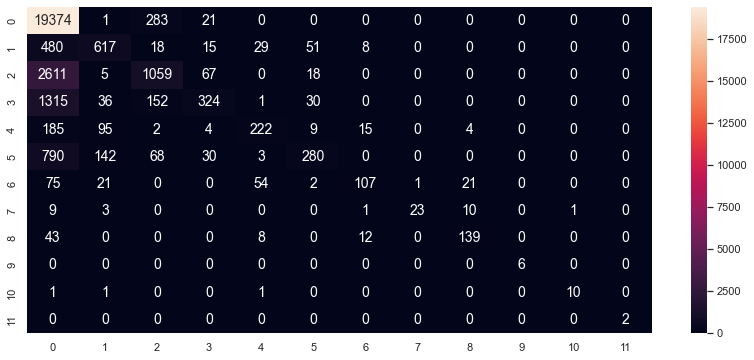

In [15]:
f = plt.figure(figsize=(14, 6))
print("Train data set: ")
sb.heatmap(confusion_matrix(y_train.values.argmax(axis=1), y_train_pred.argmax(axis=1)), 
           annot = True, fmt=".0f", annot_kws={"size": 14})

Test data set: 


<AxesSubplot:>

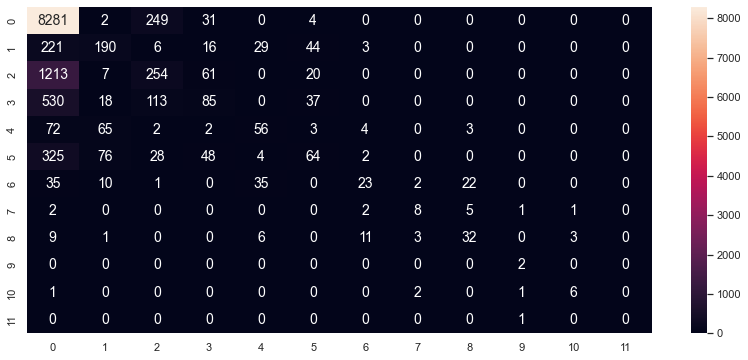

In [16]:
f = plt.figure(figsize=(14, 6))
print("Test data set: ")
sb.heatmap(confusion_matrix(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1)),  
           annot = True, fmt=".0f", annot_kws={"size": 14})

[Text(0.4936331437933693, 0.9545454545454546, 'negative <= 30.5\ngini = 0.079\nsamples = 28915\nvalue = [[9236, 19679]\n[27697, 1218]\n[25155, 3760]\n[27057, 1858]\n[28379, 536]\n[27602, 1313]\n[28634, 281]\n[28868, 47]\n[28713, 202]\n[28909, 6]\n[28902, 13]\n[28913, 2]\n[28915, 0]]'),
 Text(0.24136227833461835, 0.8636363636363636, 'positive <= 48.5\ngini = 0.033\nsamples = 20821\nvalue = [[2444, 18377]\n[20790, 31]\n[18902, 1919]\n[20437, 384]\n[20812, 9]\n[20723, 98]\n[20818, 3]\n[20821, 0]\n[20821, 0]\n[20821, 0]\n[20821, 0]\n[20821, 0]\n[20821, 0]]'),
 Text(0.1354688704703161, 0.7727272727272727, 'negative <= 12.5\ngini = 0.022\nsamples = 17707\nvalue = [[1367, 16340]\n[17680, 27]\n[16617, 1090]\n[17522, 185]\n[17701, 6]\n[17650, 57]\n[17705, 2]\n[17707, 0]\n[17707, 0]\n[17707, 0]\n[17707, 0]\n[17707, 0]\n[17707, 0]]'),
 Text(0.07023419429452583, 0.6818181818181818, 'initialprice <= 0.45\ngini = 0.018\nsamples = 15696\nvalue = [[979, 14717]\n[15677, 19]\n[14931, 765]\n[15553, 143]\

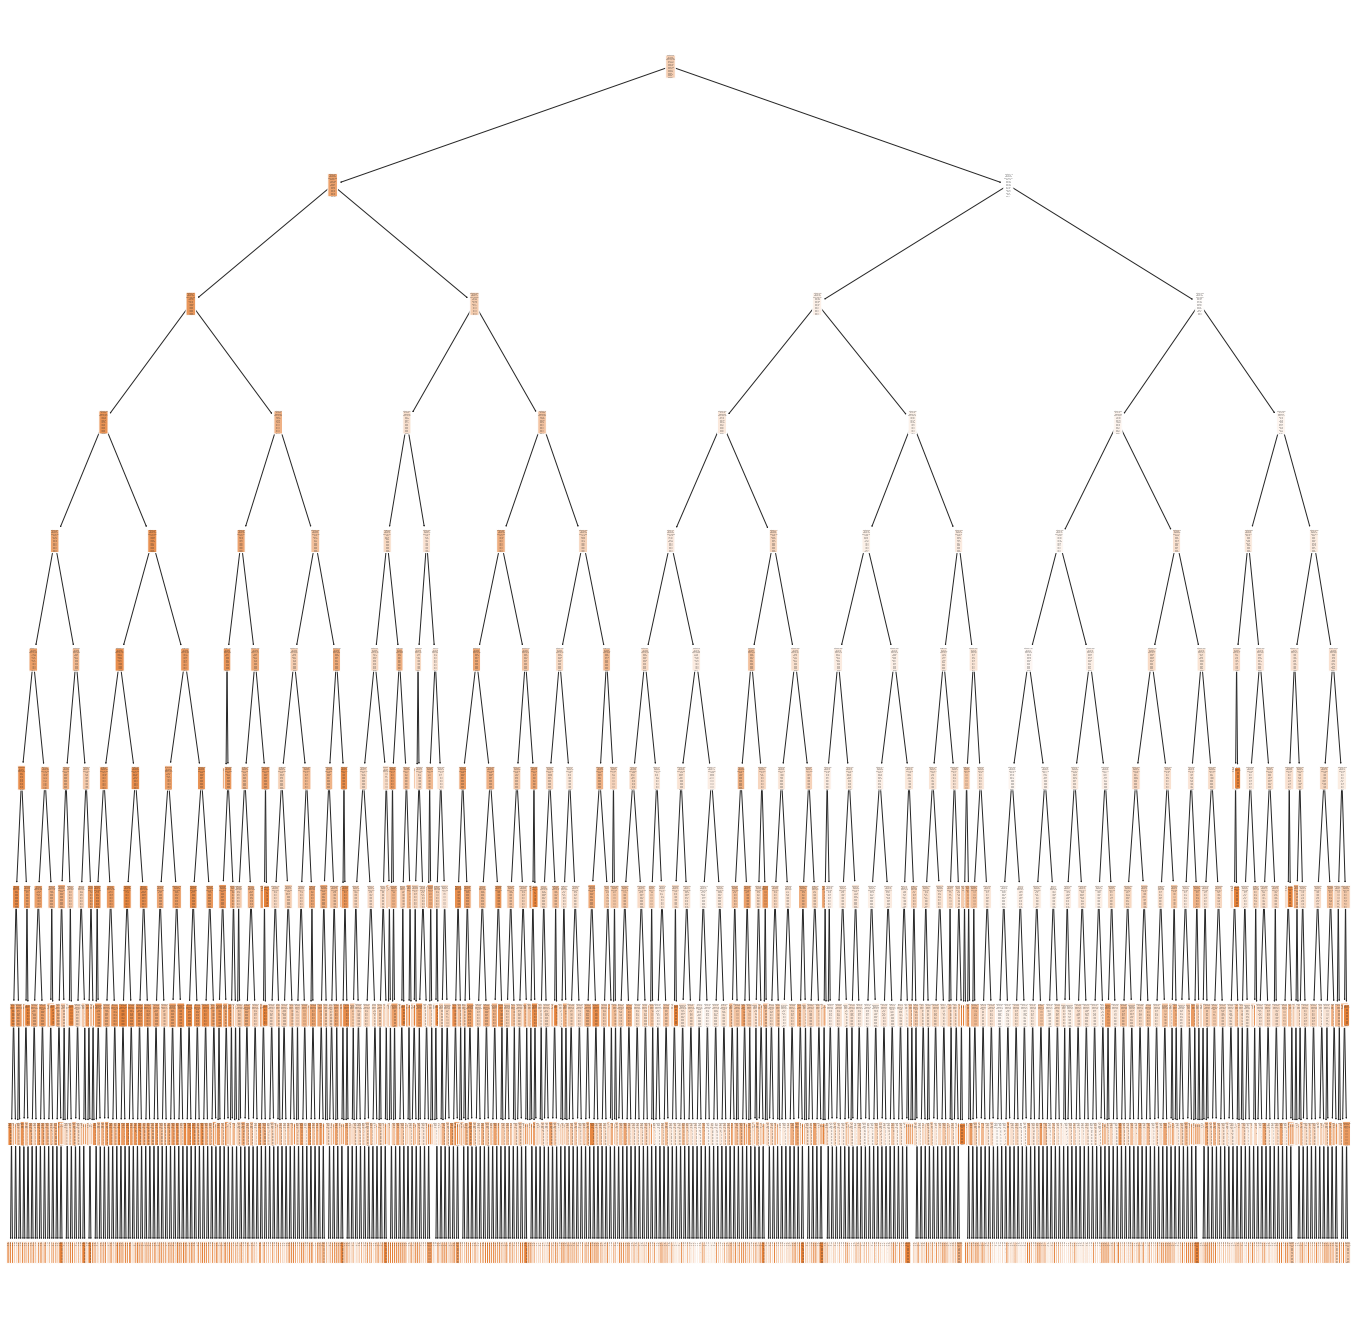

In [17]:
# Plot the trained Decision Tree 
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12'])

#### Accuracy was not up to satisfactory level so I am going to attempt resampling the data set for 12 different categories and compile it

In [18]:
# Upsample Bad to match Good

owner_cat_0_bad = data_ohe[data_ohe.owner_cat_0 == 0]
owner_cat_0_good = data_ohe[data_ohe.owner_cat_0 == 1]

# Upsample the Bad samples
owner_cat_0_bad_up = resample(owner_cat_0_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_0_good.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
data_ohe_up_0 = pd.concat([owner_cat_0_good, owner_cat_0_bad_up])
 
# Check the ratio of the classes
data_ohe_up_0['owner_cat_0'].value_counts()


owner_cat_1_bad = data_ohe[data_ohe.owner_cat_1 == 0]
owner_cat_1_good = data_ohe[data_ohe.owner_cat_1 == 1]

owner_cat_1_bad_up = resample(owner_cat_1_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_1_good.shape[0])    # to match number of Good
 
data_ohe_up_1 = pd.concat([owner_cat_1_good, owner_cat_1_bad_up])
 
data_ohe_up_1['owner_cat_1'].value_counts()



owner_cat_2_bad = data_ohe[data_ohe.owner_cat_2 == 0]
owner_cat_2_good = data_ohe[data_ohe.owner_cat_2 == 1]
 
owner_cat_2_bad_up = resample(owner_cat_2_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_2_good.shape[0])    # to match number of Good
 
data_ohe_up_2 = pd.concat([owner_cat_2_good, owner_cat_2_bad_up])
 
data_ohe_up_2['owner_cat_2'].value_counts()


owner_cat_3_bad = data_ohe[data_ohe.owner_cat_3 == 0]
owner_cat_3_good = data_ohe[data_ohe.owner_cat_3 == 1]
 
owner_cat_3_bad_up = resample(owner_cat_3_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_3_good.shape[0])    # to match number of Good
 
data_ohe_up_3 = pd.concat([owner_cat_3_good, owner_cat_3_bad_up])
 
data_ohe_up_3['owner_cat_3'].value_counts()


owner_cat_4_bad = data_ohe[data_ohe.owner_cat_4 == 0]
owner_cat_4_good = data_ohe[data_ohe.owner_cat_4 == 1]
 
owner_cat_4_bad_up = resample(owner_cat_4_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_4_good.shape[0])    # to match number of Good
 
data_ohe_up_4 = pd.concat([owner_cat_4_good, owner_cat_4_bad_up])
 
data_ohe_up_4['owner_cat_4'].value_counts()


owner_cat_5_bad = data_ohe[data_ohe.owner_cat_5 == 0]
owner_cat_5_good = data_ohe[data_ohe.owner_cat_5 == 1]
 
owner_cat_5_bad_up = resample(owner_cat_5_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_5_good.shape[0])    # to match number of Good
 
data_ohe_up_5 = pd.concat([owner_cat_5_good, owner_cat_5_bad_up])
 
data_ohe_up_5['owner_cat_5'].value_counts()


owner_cat_6_bad = data_ohe[data_ohe.owner_cat_6 == 0]
owner_cat_6_good = data_ohe[data_ohe.owner_cat_6 == 1]
 
owner_cat_6_bad_up = resample(owner_cat_6_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_6_good.shape[0])    # to match number of Good
 
data_ohe_up_6 = pd.concat([owner_cat_6_good, owner_cat_6_bad_up])
 
data_ohe_up_6['owner_cat_6'].value_counts()


owner_cat_7_bad = data_ohe[data_ohe.owner_cat_7 == 0]
owner_cat_7_good = data_ohe[data_ohe.owner_cat_7 == 1]
 
owner_cat_7_bad_up = resample(owner_cat_7_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_7_good.shape[0])    # to match number of Good
 
data_ohe_up_7 = pd.concat([owner_cat_7_good, owner_cat_7_bad_up])
 
data_ohe_up_7['owner_cat_7'].value_counts()


owner_cat_8_bad = data_ohe[data_ohe.owner_cat_8 == 0]
owner_cat_8_good = data_ohe[data_ohe.owner_cat_8 == 1]
 
owner_cat_8_bad_up = resample(owner_cat_8_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_8_good.shape[0])    # to match number of Good
 
data_ohe_up_8 = pd.concat([owner_cat_8_good, owner_cat_8_bad_up])
 
data_ohe_up_8['owner_cat_8'].value_counts()


owner_cat_9_bad = data_ohe[data_ohe.owner_cat_9 == 0]
owner_cat_9_good = data_ohe[data_ohe.owner_cat_9 == 1]
 
owner_cat_9_bad_up = resample(owner_cat_9_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_9_good.shape[0])    # to match number of Good
 
data_ohe_up_9 = pd.concat([owner_cat_9_good, owner_cat_9_bad_up])
 
data_ohe_up_9['owner_cat_9'].value_counts()


owner_cat_10_bad = data_ohe[data_ohe.owner_cat_10 == 0]
owner_cat_10_good = data_ohe[data_ohe.owner_cat_10 == 1]
 
owner_cat_10_bad_up = resample(owner_cat_10_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_10_good.shape[0])    # to match number of Good
 
data_ohe_up_10 = pd.concat([owner_cat_10_good, owner_cat_10_bad_up])
 
data_ohe_up_10['owner_cat_10'].value_counts()


owner_cat_11_bad = data_ohe[data_ohe.owner_cat_11 == 0]
owner_cat_11_good = data_ohe[data_ohe.owner_cat_11 == 1]
 
owner_cat_11_bad_up = resample(owner_cat_11_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_11_good.shape[0])    # to match number of Good
 
data_ohe_up_11 = pd.concat([owner_cat_11_good, owner_cat_11_bad_up])
 
data_ohe_up_11['owner_cat_11'].value_counts()


owner_cat_12_bad = data_ohe[data_ohe.owner_cat_12 == 0]
owner_cat_12_good = data_ohe[data_ohe.owner_cat_12 == 1]
 
owner_cat_12_bad_up = resample(owner_cat_12_bad, 
                        replace=True,                     # sample with replacement
                        n_samples=owner_cat_12_good.shape[0])    # to match number of Good
 
data_ohe_up_12 = pd.concat([owner_cat_12_good, owner_cat_12_bad_up])
 
data_ohe_up_12['owner_cat_12'].value_counts()


# Compile all dataframe into 1 big dataframe again!
data_ohe_up = pd.concat([data_ohe_up_0, data_ohe_up_1, data_ohe_up_2, 
                         data_ohe_up_3, data_ohe_up_4, data_ohe_up_5, data_ohe_up_6,
                         data_ohe_up_7, data_ohe_up_8, data_ohe_up_9, data_ohe_up_10, data_ohe_up_11, data_ohe_up_12])
data_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82616 entries, 0 to 28901
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   positive               82616 non-null  int64  
 1   negative               82616 non-null  int64  
 2   initialprice           82616 non-null  float64
 3   total_lang             82616 non-null  int64  
 4   18+                    82616 non-null  int64  
 5   Indie                  82616 non-null  int64  
 6   Free To Play           82616 non-null  int64  
 7   RPG                    82616 non-null  int64  
 8   Strategy               82616 non-null  int64  
 9   Sports                 82616 non-null  int64  
 10  Simulation             82616 non-null  int64  
 11  Racing                 82616 non-null  int64  
 12  Massivley Multiplayer  82616 non-null  int64  
 13  Act_Adv                82616 non-null  int64  
 14  review                 82616 non-null  int64  
 15  ow

In [19]:
# split data into x and y for predictor and response variable, and separate further into train and test data set

y = pd.DataFrame(data_ohe_up[['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12']])
x = pd.DataFrame(data_ohe_up.drop(['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12'], axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  # change max_depth to experiment
dectree.fit(x_train, y_train)                    # train the decision tree model



DecisionTreeClassifier(max_depth=10)

#### Even when onehot encoded and resampled, model is not very good :(

In [20]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6174715982777403

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5845067581198305



Train data set: 


<AxesSubplot:>

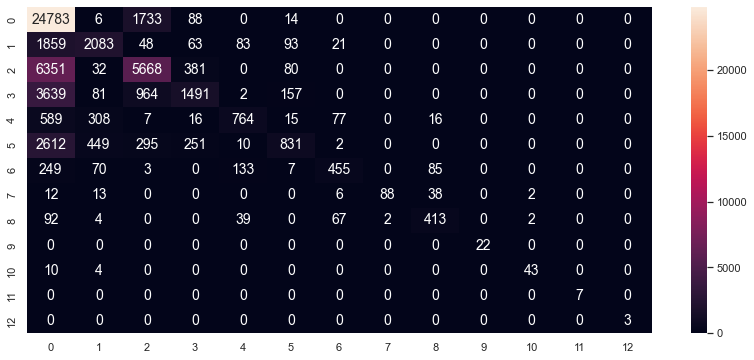

In [21]:
f = plt.figure(figsize=(14, 6))
print("Train data set: ")
sb.heatmap(confusion_matrix(y_train.values.argmax(axis=1), y_train_pred.argmax(axis=1)), 
           annot = True, fmt=".0f", annot_kws={"size": 14})

Test data set: 


<AxesSubplot:>

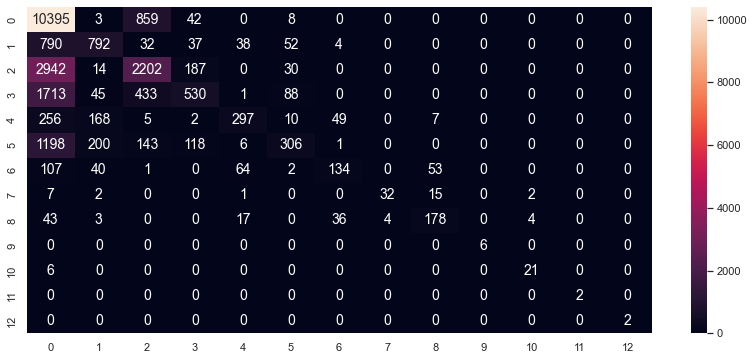

In [22]:
f = plt.figure(figsize=(14, 6))
print("Test data set: ")
sb.heatmap(confusion_matrix(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1)),  
           annot = True, fmt=".0f", annot_kws={"size": 14})

[Text(0.4811183608058608, 0.9545454545454546, 'negative <= 23.5\ngini = 0.11\nsamples = 57831\nvalue = [[31207, 26624]\n[53581, 4250]\n[45319, 12512]\n[51497, 6334]\n[56039, 1792]\n[53381, 4450]\n[56829, 1002]\n[57672, 159]\n[57212, 619]\n[57809, 22]\n[57774, 57]\n[57824, 7]\n[57828, 3]]'),
 Text(0.2324004120879121, 0.8636363636363636, 'positive <= 39.5\ngini = 0.056\nsamples = 30757\nvalue = [[6773, 23984]\n[30669, 88]\n[25477, 5280]\n[29673, 1084]\n[30732, 25]\n[30477, 280]\n[30741, 16]\n[30757, 0]\n[30757, 0]\n[30757, 0]\n[30757, 0]\n[30757, 0]\n[30757, 0]]'),
 Text(0.13203983516483517, 0.7727272727272727, 'negative <= 12.5\ngini = 0.042\nsamples = 24841\nvalue = [[3869, 20972]\n[24766, 75]\n[21807, 3034]\n[24282, 559]\n[24824, 17]\n[24665, 176]\n[24833, 8]\n[24841, 0]\n[24841, 0]\n[24841, 0]\n[24841, 0]\n[24841, 0]\n[24841, 0]]'),
 Text(0.06488095238095239, 0.6818181818181818, 'initialprice <= 1.75\ngini = 0.038\nsamples = 22505\nvalue = [[3127, 19378]\n[22448, 57]\n[20101, 2404]\n

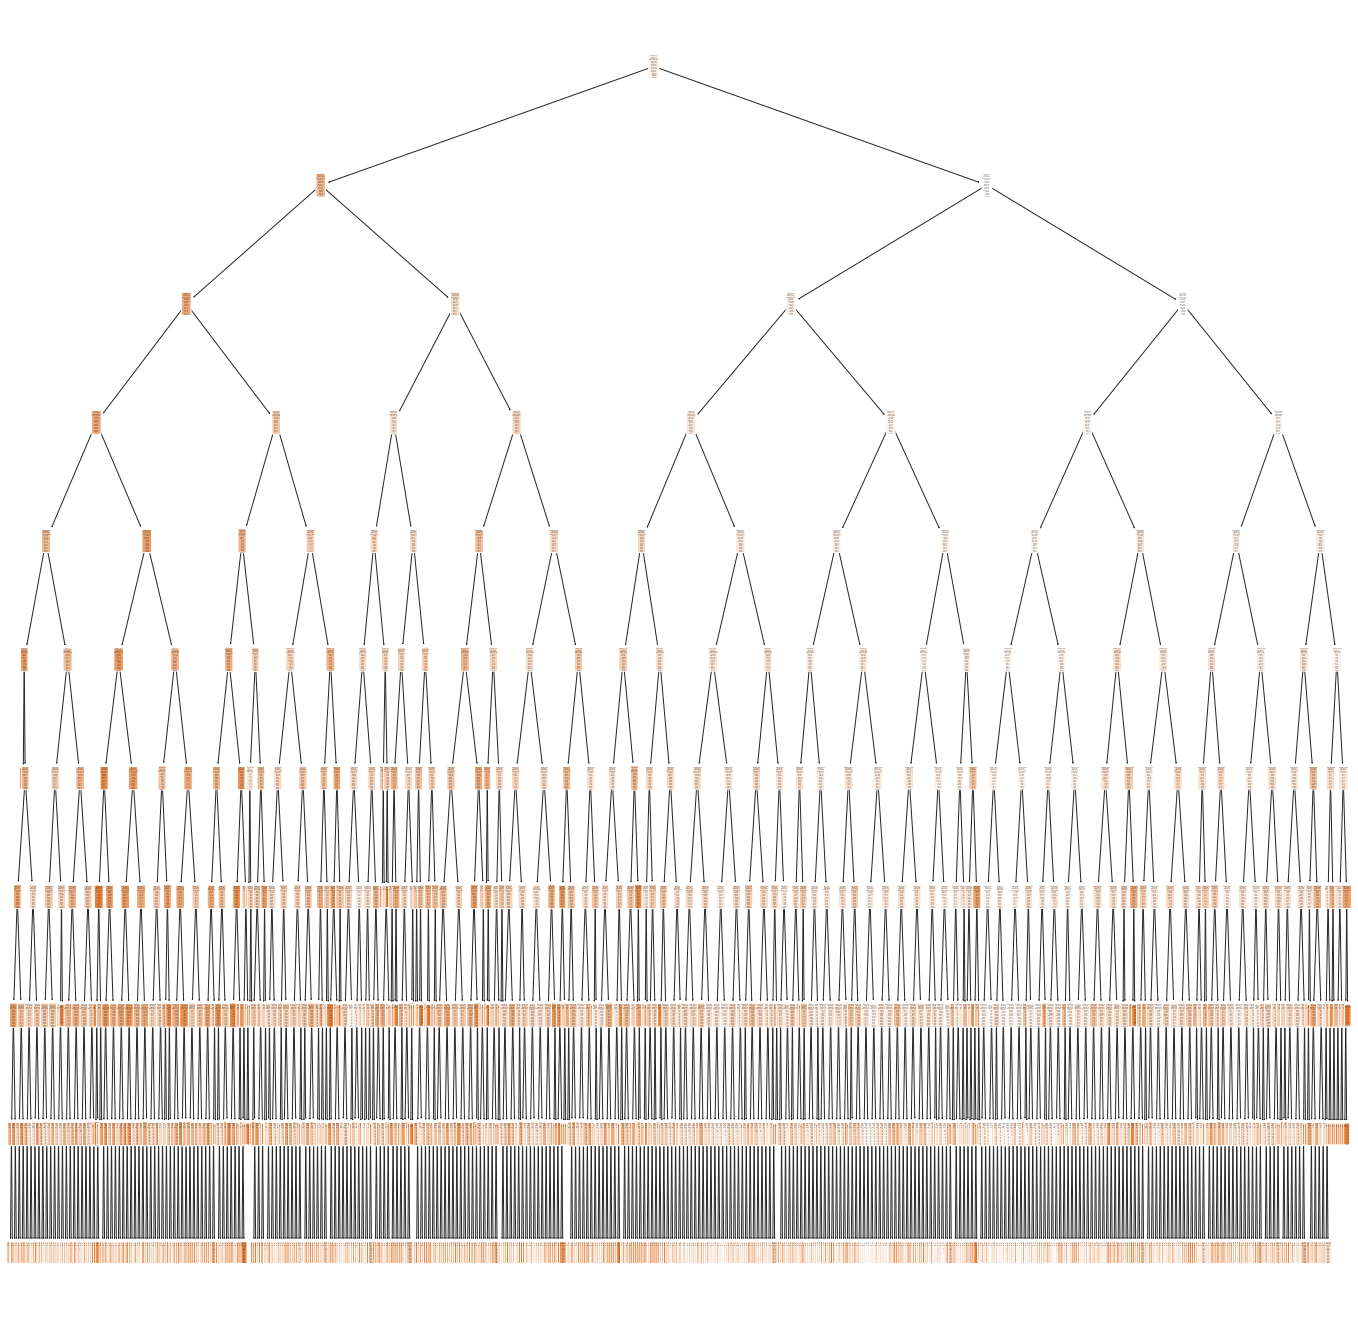

In [23]:
# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=x_train.columns, 
          class_names=['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12'])

### Random Forest Classifer Attempt (not onehot encoded)

#### Estimators = 1000, max_depth = 10

In [24]:
owner_cat = pd.DataFrame(data["owner_cat"])
predictors = pd.DataFrame(data[['positive', 'negative', 'initialprice', 
                             'total_lang', '18+', 'Indie', 'Free To Play', 
                             'RPG', 'Strategy', 'Sports', 'Simulation', 
                             'Racing', 'Massivley Multiplayer', 'Act_Adv', 'review']])

In [25]:
# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(predictors, owner_cat, test_size = 0.3)

rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(x_train, y_train.values.argmax(axis=1))

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [26]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)
y_test_pred = rforest.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Random Forest Accuracy \t:", rforest.score(x_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Random Forest Accuracy \t:", rforest.score(x_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Random Forest Accuracy 	: 0.6832094068822411

Goodness of Fit of Model 	Test Dataset
Random Forest Accuracy 	: 0.6851448398289357



Train data set: 


<AxesSubplot:>

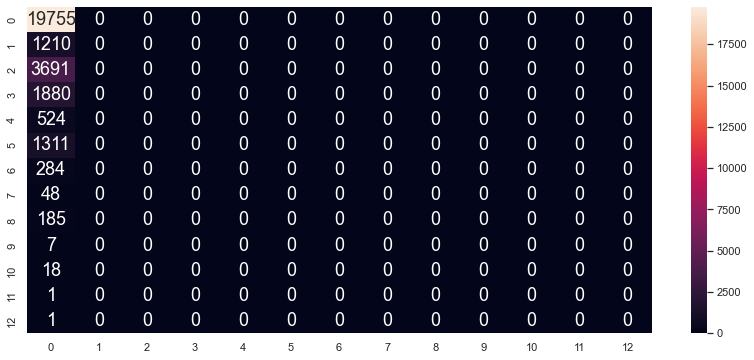

In [27]:
# Plot the two-way Confusion Matrix
f = plt.figure(figsize=(14, 6))
print("Train data set: ")
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test data set: 


<AxesSubplot:>

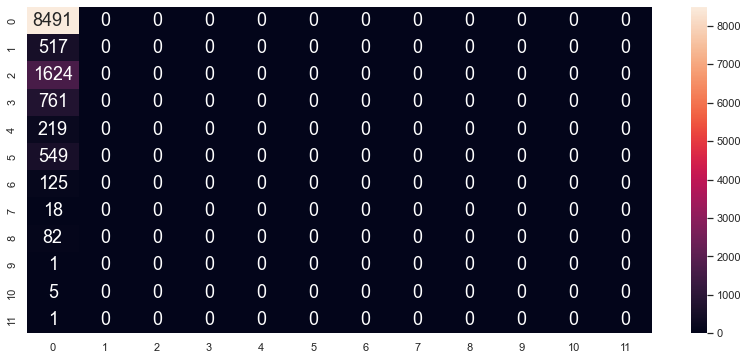

In [28]:
# Plot the two-way Confusion Matrix
f = plt.figure(figsize=(14, 6))
print("Test data set: ")
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Random Forest Classifer Attempt (onehot encoded)

#### Estimators = 1000, max_depth = 10

In [29]:
# Import essential models and functions from sklearn

# Extract Response and Predictors
y = pd.DataFrame(data_ohe_up[['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12']])
x = pd.DataFrame(data_ohe_up.drop(['owner_cat_0', 'owner_cat_1', 'owner_cat_2', 'owner_cat_3', 'owner_cat_4', 'owner_cat_5', 'owner_cat_6', 'owner_cat_7', 'owner_cat_8', 'owner_cat_9', 'owner_cat_10', 'owner_cat_11', 'owner_cat_12'], axis = 1))

# Split the Dataset into Train and Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(x_train, y_train.values.argmax(axis=1))

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [30]:
# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(x_train)
y_test_pred = rforest.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Random Forest Accuracy \t:", rforest.score(x_train, y_train.values.argmax(axis=1)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Random Forest Accuracy \t:", rforest.score(x_test, y_test.values.argmax(axis=1)))
print()

Goodness of Fit of Model 	Train Dataset
Random Forest Accuracy 	: 0.7293493109232073

Goodness of Fit of Model 	Test Dataset
Random Forest Accuracy 	: 0.7049425055477103



Train data set: 


<AxesSubplot:>

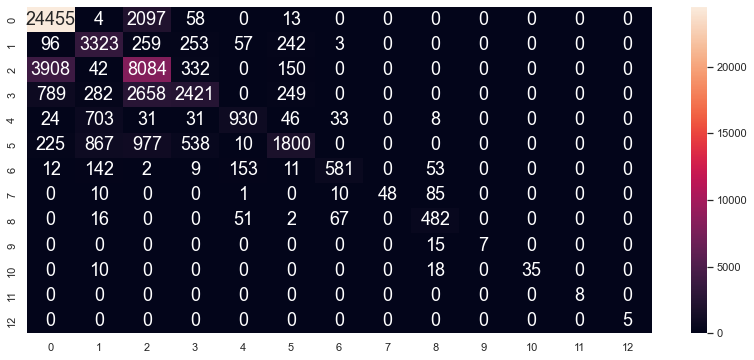

In [31]:
# Plot the two-way Confusion Matrix
f = plt.figure(figsize=(14, 6))
print("Train data set: ")
sb.heatmap(confusion_matrix(y_train.values.argmax(axis=1), y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test data set: 


<AxesSubplot:>

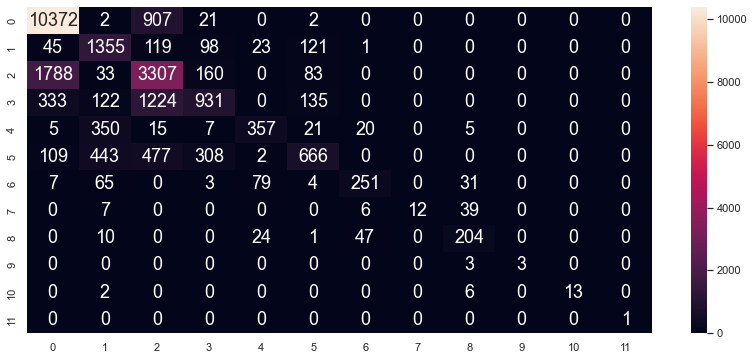

In [32]:
# Plot the two-way Confusion Matrix
f = plt.figure(figsize=(14, 6))
print("Test data set: ")
sb.heatmap(confusion_matrix(y_test.values.argmax(axis=1), y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})